In [1]:
from simulate import simulate
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import shutil

In [2]:
SIMTIME = 12
NUMF = 20

df = pd.DataFrame()

pd.concat([df, simulate(SIMTIME, NUMF, 0.3)], ignore_index=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,sim_time,forget_threshold,num_facts,model_sof,c,s,F,t0
0,0.204297,0.325391,0.214062,0.398047,0.380469,0.331641,0.201172,0.276953,0.309375,0.422266,...,0.291016,0.264063,12.0,-0.8,20.0,0.3,0.25,0.3,1.0,0.3


In [3]:
SIMTIME = 12
NUMFACTS = 20
NUMREPS = 10
s = 0.3
c = 0.25

df = pd.DataFrame()
for msof in [x / 100 for x in range(20, 50)]:
    for _ in range(NUMREPS):
        df = pd.concat([df, simulate(SIMTIME, NUMFACTS, msof, c, s,)], ignore_index=True)

df.to_csv("dataanalysis\data\S\\0.2")


for index, row in df.iterrows():
    print(row[0])
    plt.scatter([row["model_sof"] for _ in range(NUMFACTS)], row[0:NUMFACTS])

plt.show()

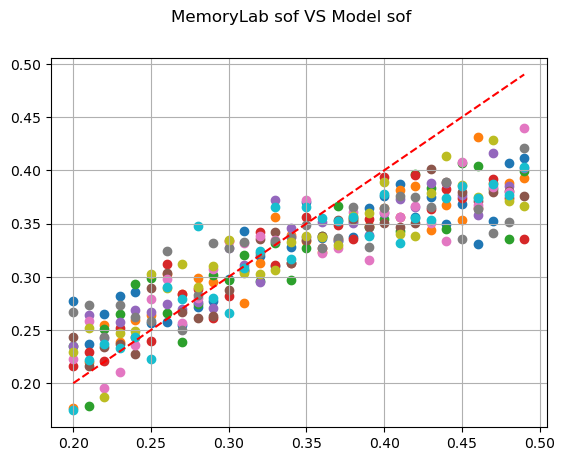

In [ ]:
df = pd.read_csv("dataanalysis\data\practdata")
l = []

for index, row in df.iterrows():
    
    facts = row[1:int(row["num_facts"] + 1)]
    facts = [x for x in facts if x != 0.3]
    avg = sum(facts) / len(facts)
    plt.scatter(row["model_sof"], avg)

plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof")
plt.show()
